# Tugas Tahap A

**Kelompok Kepalsuan Hidup :**
1. 13515041 - Leo Nadeak
2. 13515053 - Yohanes Jhouma
3. 13515084 - Bethea Zia
4. 13515102 - Bobby Nainggolan
5. 13515126 - Mico


## Melakukan Import data menggunakan pandas

In [1]:
import pandas as pd
import numpy as np

In [2]:
data_train = pd.read_csv('.\DatasetEskperimen\CensusIncome\CencusIncome.data.txt')
data_test = pd.read_csv('.\DatasetEskperimen\CensusIncome\CencusIncome.test.txt')

In [3]:
data = pd.concat([data_train, data_test], keys=['train', 'test'])

## Melakukan pengubahan kolom class menjadi numerik

Pengubahan kolom *class* menjadi numerik dilakukan karena *tools sklearn* yang digunakan umumnya melakukan pembelajaran dengan parameter angka sebagai inputannya.

In [4]:
def changeClassToNumber(x):
    if x == '<=50K':
        return 0
    elif x == '>50K':
        return 1
    else:
        return -1

In [5]:
data['class'] = data['class'].map(lambda x: changeClassToNumber(x))

## Melakukan penanganan missing value

Pada data yang digunakan terdapat beberapa *missing value* yang dapat mengurangi kinerja dari model yang digunakan pada data. Kinerja yang dimaksud diukur dari besar akurasi hasil yang diberikan oleh model. Melihat keadaan ini, perlu dilakukan penanganan terhadapa *missing value* tersebut. Karena *object* yang memiliki *missing value* adalah *object*, maka *missing value* akan digantikan dengan nilai modus dari kolom tersebut.

In [6]:
print("Banyaknya data:", len(data))
print("--------------------------------------------------------------------")
print(data.info())

Banyaknya data: 48842
--------------------------------------------------------------------
<class 'pandas.core.frame.DataFrame'>
MultiIndex: 48842 entries, (train, 0) to (test, 16280)
Data columns (total 15 columns):
age               48842 non-null int64
workclass         46043 non-null object
fnlwgt            48842 non-null int64
education         48842 non-null object
education-num     48842 non-null int64
marital-status    48842 non-null object
occupation        46033 non-null object
relationship      48842 non-null object
race              48842 non-null object
sex               48842 non-null object
capital-gain      48842 non-null int64
capital-loss      48842 non-null int64
hours-per-week    48842 non-null int64
native-country    47985 non-null object
class             48842 non-null int64
dtypes: int64(7), object(8)
memory usage: 6.0+ MB
None


In [7]:
data["workclass"].fillna(data["workclass"].mode()[0], inplace=True)
data["occupation"].fillna(data["occupation"].mode()[0], inplace=True)
data["native-country"].fillna(data["native-country"].mode()[0], inplace=True)

In [8]:
data.info()

<class 'pandas.core.frame.DataFrame'>
MultiIndex: 48842 entries, (train, 0) to (test, 16280)
Data columns (total 15 columns):
age               48842 non-null int64
workclass         48842 non-null object
fnlwgt            48842 non-null int64
education         48842 non-null object
education-num     48842 non-null int64
marital-status    48842 non-null object
occupation        48842 non-null object
relationship      48842 non-null object
race              48842 non-null object
sex               48842 non-null object
capital-gain      48842 non-null int64
capital-loss      48842 non-null int64
hours-per-week    48842 non-null int64
native-country    48842 non-null object
class             48842 non-null int64
dtypes: int64(7), object(8)
memory usage: 6.0+ MB


In [9]:
def one_hot_encode(df, label):
    onehot = pd.get_dummies(df[label],prefix=label)
    df.drop(label, axis=1,inplace = True)
    return df.join(onehot)

In [10]:
def changeSexToNumber(x):
    if x == 'Female':
        return 0
    elif x == 'Male':
        return 1
    else:
        return np.nan

#data.drop('race',axis=1, inplace=True)
#data.drop('native-country',axis=1, inplace=True)

In [11]:
data = one_hot_encode(data.drop("class", axis=1), "workclass").join(data["class"])
data = one_hot_encode(data.drop("class", axis=1), "education").join(data["class"])
data = one_hot_encode(data.drop("class", axis=1), "marital-status").join(data["class"])
data = one_hot_encode(data.drop("class", axis=1), "occupation").join(data["class"])
data = one_hot_encode(data.drop("class", axis=1), "relationship").join(data["class"])
data = one_hot_encode(data.drop("class", axis=1), "race").join(data["class"])
data = one_hot_encode(data.drop("class", axis=1), "native-country").join(data["class"])
data['sex'] = data['sex'].map(lambda x: changeSexToNumber(x))

In [12]:
data.head(5)

age  fnlwgt  education-num  sex  capital-gain  capital-loss  \
train 0   39   77516             13    1          2174             0   
      1   50   83311             13    1             0             0   
      2   38  215646              9    1             0             0   
      3   53  234721              7    1             0             0   
      4   28  338409             13    0             0             0   

         hours-per-week  workclass_Federal-gov  workclass_Local-gov  \
train 0              40                      0                    0   
      1              13                      0                    0   
      2              40                      0                    0   
      3              40                      0                    0   
      4              40                      0                    0   

         workclass_Never-worked  ...    native-country_Puerto-Rico  \
train 0                       0  ...                             0   
      1                       0  ...                             0   
      2                       0  ...                             0   
      3                       0  ...                             0   
      4                       0  ...                             0   

         native-country_Scotland  native-country_South  native-country_Taiwan  \
train 0                        0                     0                      0   
      1                        0                     0                      0   
      2                        0                     0                      0   
      3                        0                     0                      0   
      4                        0                     0                      0   

         native-country_Thailand  native-country_Trinadad&Tobago  \
train 0                        0                               0   
      1                        0                               0   
      2                        0                               0   
      3                        0                               0   
      4                        0                               0   

         native-country_United-States  native-country_Vietnam  \
train 0                             1                       0   
      1                             1                       0   
      2                             1                       0   
      3                             1                       0   
      4                             0                       0   

         native-country_Yugoslavia  class  
train 0                          0      0  
      1                          0      0  
      2                          0      0  
      3                          0      0  
      4                          0      0  

[5 rows x 105 columns]

Data yang digunakan dalam pembelajaran ini memiliki beberapa atribut(*high dimensional data*), sehingga terdapat banyak variabel.Untuk mempermudah dalam memproses data ini, dimensi dari data perlu direduksi tanpa mengurangi karakteristik data tersebut secara signifikan. Reduksi tersebut dilakukan dengan menggunakan teknik ***Principal Component Analysis (PCA)***. PCA dilakukan dengan cara membagi-bagi Dataset yang digunakan menjadi beberapa subset. Subset dibuat dengan cara membuat variabel baru yang dibentuk berdasarkan komponen utama pertama dari setiap subset.

In [18]:
thefile = open('test.txt', 'w')
for item in data.columns:
    print(item)
    thefile.write("%s\n" % item)

thefile.close()

age
fnlwgt
education-num
sex
capital-gain
capital-loss
hours-per-week
workclass_Federal-gov
workclass_Local-gov
workclass_Never-worked
workclass_Private
workclass_Self-emp-inc
workclass_Self-emp-not-inc
workclass_State-gov
workclass_Without-pay
education_10th
education_11th
education_12th
education_1st-4th
education_5th-6th
education_7th-8th
education_9th
education_Assoc-acdm
education_Assoc-voc
education_Bachelors
education_Doctorate
education_HS-grad
education_Masters
education_Preschool
education_Prof-school
education_Some-college
marital-status_Divorced
marital-status_Married-AF-spouse
marital-status_Married-civ-spouse
marital-status_Married-spouse-absent
marital-status_Never-married
marital-status_Separated
marital-status_Widowed
occupation_Adm-clerical
occupation_Armed-Forces
occupation_Craft-repair
occupation_Exec-managerial
occupation_Farming-fishing
occupation_Handlers-cleaners
occupation_Machine-op-inspct
occupation_Other-service
occupation_Priv-house-serv
occupation_Prof-spe

In [19]:
from sklearn.decomposition import PCA
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
feature = data.drop("class",axis=1).columns

In [20]:
feature

Index(['age', 'fnlwgt', 'education-num', 'sex', 'capital-gain', 'capital-loss',
       'hours-per-week', 'workclass_Federal-gov', 'workclass_Local-gov',
       'workclass_Never-worked',
       ...
       'native-country_Portugal', 'native-country_Puerto-Rico',
       'native-country_Scotland', 'native-country_South',
       'native-country_Taiwan', 'native-country_Thailand',
       'native-country_Trinadad&Tobago', 'native-country_United-States',
       'native-country_Vietnam', 'native-country_Yugoslavia'],
      dtype='object', length=104)

In [21]:
scaler = StandardScaler()

In [22]:
data[feature] = scaler.fit_transform(data.drop("class", axis=1))

In [23]:
pca = PCA()
pca.fit(data[feature].values)
var = pca.explained_variance_ratio_
var1 = np.cumsum(np.round(pca.explained_variance_ratio_, decimals=4)*100)

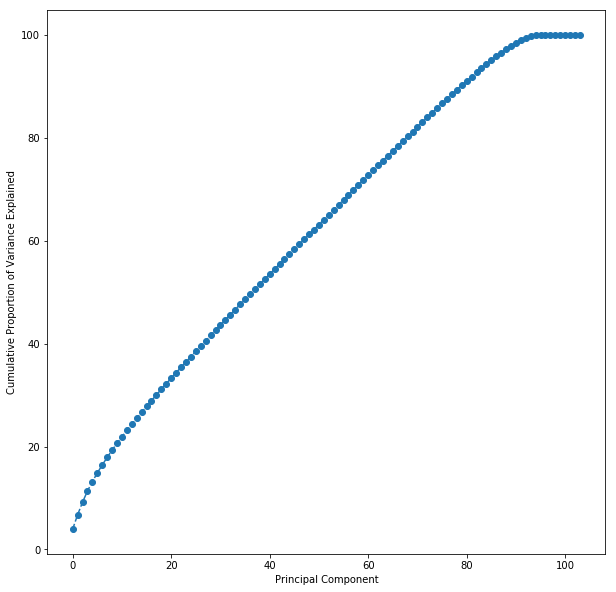

In [24]:
plt.figure(figsize=(10,10))
plt.xlabel('Principal Component')
plt.ylabel('Cumulative Proportion of Variance Explained')
plt.plot(var1,"o--")
plt.savefig('PCA.png')
plt.show()

Dari grafik di atas, dapat dilihat setelah jumlah data sekitar 85 sudah tidak ada lagi perbedaan yang signifikan pada variansi data. Oleh karena itu, tidak perlu menggunakan seluruh data. Pada pembelajaran ini, dipilih jumlah data sebanyak 85.

In [25]:
var1[85]

95.09999999999998

In [26]:
X_train = data.loc['train'].drop("class", axis=1).values
X_test = data.loc['test'].drop("class", axis=1).values
n = 85

In [27]:
pca = PCA(n_components=n)
pca.fit(data.drop("class", axis=1).values)

PCA(copy=True, iterated_power='auto', n_components=85, random_state=None,
  svd_solver='auto', tol=0.0, whiten=False)

In [28]:
X_train = pca.transform(X_train)
X_test = pca.transform(X_test)

In [29]:
X_train.shape

(32561, 85)

In [29]:
data_train = pd.DataFrame(X_train).join(data.loc['train']['class'])
data_test = pd.DataFrame(X_test).join(data.loc['test']['class'])

In [33]:
col_name = []
for i in range(n):
    col_name.append("PC_"+str(i+1))
col_name.append("class")

In [32]:
data_train.columns = col_name
data_test.columns = col_name

In [36]:
data_train.to_csv('train.csv', index=False)
data_test.to_csv('test.csv', index=False)

## Validasi Model

In [34]:
from sklearn.model_selection import StratifiedKFold
from sklearn.metrics import accuracy_score

In [35]:
def cross_val_check(clf, data, label, k=10):
    folds = StratifiedKFold(n_splits=k, random_state=42, shuffle=True)
    folds.get_n_splits(data, label)
    accuracy = []
    for train_index, test_index in folds.split(data, label):
        X_train, X_test = data[train_index], data[test_index]
        y_train, y_test = label[train_index], label[test_index]
        clf.fit(X_train, y_train)
        y_pred = clf.predict(X_test)
        accuracy.append(accuracy_score(y_test, y_pred))
        
    plt.title("ACCURACY PLOT")
    plt.xlabel("K-th Fold")
    plt.ylabel("Accuracy")
    plt.xticks(range(k),range(1,k+1))
    plt.plot(accuracy, 'o--')
    plt.axhline(y=np.mean(accuracy), color='r', linestyle='-')
    plt.show()
    return accuracy

In [36]:
import scipy as sp
import scipy.stats

def mean_confidence_interval(data, confidence=0.95):
    a = 1.0*np.array(data)
    n = len(a)
    m, se = np.mean(a), scipy.stats.sem(a)
    h = se * sp.stats.t._ppf((1+confidence)/2., n-1)
    print(round(m,3), "(+/-)", round(h,3))

### 1. DECISION TREE

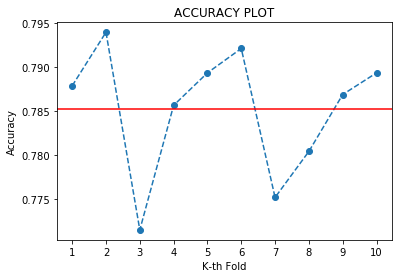

In [41]:
from sklearn.tree import DecisionTreeClassifier

DTL_clf = DecisionTreeClassifier(criterion='entropy', min_samples_split=5, max_depth=100)

acc = cross_val_check(DTL_clf, data_train.drop('class', axis=1).values, data_train['class'].values)

Akurasi dari hasil yang diberikan model Decision Tree adalah sebagai berikut :

In [43]:
mean_confidence_interval(acc)

0.785 (+/-) 0.005


### 2. NAIVE BAYES

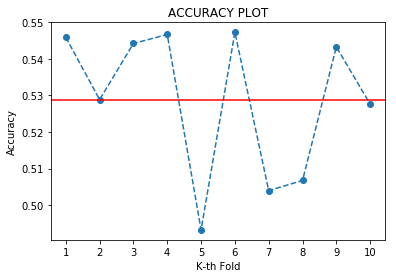

In [44]:
from sklearn.naive_bayes import GaussianNB
NB_clf = GaussianNB()
acc_NB = cross_val_check(NB_clf, data_train.drop('class', axis=1).values, data_train['class'].values)

Akurasi dari hasil yang diberikan model Naive Bayes adalah sebagai berikut :

In [45]:
mean_confidence_interval(acc_NB)

0.529 (+/-) 0.015


### 3. K-NEAREST NEIGHBORS

kNN yang digunakan adalah 15-NN, dengan kata lain data yang digunakan untuk mendapat hasil prediksi adalah semua data dengan jarak 15 dengan data yang akan diprediksi.

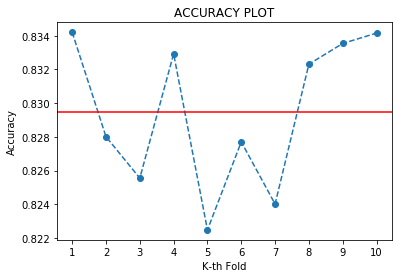

In [57]:
from sklearn.neighbors import KNeighborsClassifier
KNN_clf = KNeighborsClassifier(n_neighbors=20)
acc_KNN = cross_val_check(KNN_clf, data_train.drop('class', axis=1).values, data_train['class'].values)

Akurasi dari hasil yang diberikan model kNN adalah sebagai berikut :

In [59]:
mean_confidence_interval(acc_KNN)

0.829 (+/-) 0.003


### 4. MULTILAYER PERCEPTRON

C:\Users\GE60\Anaconda2\envs\py35\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:563: ConvergenceWarning: Stochastic Optimizer: Maximum iterations reached and the optimization hasn't converged yet.
  % (), ConvergenceWarning)


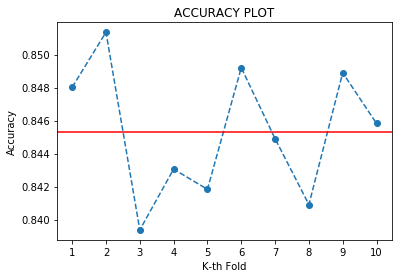

In [66]:
from sklearn.neural_network import MLPClassifier
MLP_clf = MLPClassifier(hidden_layer_sizes=(43,),activation='logistic', max_iter=200)
acc_MLP = cross_val_check(MLP_clf, data_train.drop('class', axis=1).values, data_train['class'].values)

Akurasi dari hasil yang diberikan model MLP adalah sebagai berikut :

In [67]:
mean_confidence_interval(acc_MLP)


0.845 (+/-) 0.003


Dengan melihat akurasi dari hasil prediksi pada *data_test* yang digunakan oleh keseluruhan model diperoleh MLP sebagai algoritma pembelajaran terbaik dalammengolah data yang telah ditangani sebelumnya. Berikut *confussion matrix* dari MLP yang diimplementasikan.

In [60]:
from sklearn.metrics import confusion_matrix
import itertools


def plot_confusion_matrix(cm, classes,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    
    cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
    with plt.xkcd():
        plt.imshow(cm, interpolation='nearest', cmap=cmap)
        plt.title(title)
        plt.colorbar()
        tick_marks = np.arange(len(classes))
        plt.xticks(tick_marks, classes, rotation=45)
        plt.yticks(tick_marks, classes)

        thresh = cm.max() / 2.
        for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
            plt.text(j, i, format(cm[i, j], '.2f'),
                     horizontalalignment="center",
                     color="black")

        plt.tight_layout()
        plt.ylabel('True label')
        plt.xlabel('Predicted label')

In [61]:

def show_matrix(y_true, y_pred):    
    cnf_matrix = confusion_matrix(y_true, y_pred)
    np.set_printoptions(precision=2)

    plt.figure()
    plot_confusion_matrix(cnf_matrix, classes=[0,1],
                      title='Confusion Matrix')
    plt.show()

In [68]:
final_model = MLPClassifier(hidden_layer_sizes=(43,),activation='logistic', max_iter=200)
final_model.fit(data_train.drop('class',axis=1).values, data_train['class'].values)

MLPClassifier(activation='logistic', alpha=0.0001, batch_size='auto',
       beta_1=0.9, beta_2=0.999, early_stopping=False, epsilon=1e-08,
       hidden_layer_sizes=(43,), learning_rate='constant',
       learning_rate_init=0.001, max_iter=200, momentum=0.9,
       nesterovs_momentum=True, power_t=0.5, random_state=None,
       shuffle=True, solver='adam', tol=0.0001, validation_fraction=0.1,
       verbose=False, warm_start=False)

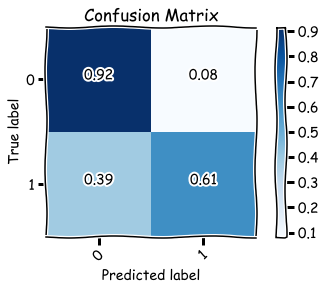

In [69]:
y_pred = final_model.predict(data_test.drop('class',axis=1).values)

show_matrix(data_test['class'].values, y_pred)

## MENYIMPAN SEMUA OBJECT

In [70]:
from sklearn.externals import joblib

In [71]:
joblib.dump(pca, "SavedObject/pca.pkl")
joblib.dump(scaler, "SavedObject/scaler.pkl")
joblib.dump(final_model, "SavedObject/model.pkl")

['SavedObject/model.pkl']